In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = "26"
#plt.rcParams['savefig.facecolor'] = "0.5"
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [16]:
bColor = "red"
oColor = "green"
hColor = "blue"

In [17]:
result = pd.read_csv(r"Addition/foods_vary_n.csv")

In [18]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,Our_Time_distanceTo,Blom_Time_distanceTo,Our_Time_lbcall,Blom_Time_lbcall
0,foods_n=10_ballot=4,10,74,4,2,19,19,19,19,0.001558,...,0,22456,22457,22457,1.771415,1070,4.833896,660.880881,0.000135,1.816332
1,foods_n=10_ballot=4,10,74,4,1,15,15,15,15,0.002292,...,0,938,1904,1904,0.260649,0,0.133187,5.511911,0.000290,0.276716
2,foods_n=9_ballot=4,9,72,4,2,19,19,19,19,0.001184,...,0,4473,4474,4474,0.241753,328,0.603583,66.201741,0.000108,0.272551
3,foods_n=9_ballot=4,9,72,4,1,15,15,15,15,0.003640,...,0,203,428,428,0.047743,0,0.020560,0.810132,0.000332,0.049968
4,foods_n=9_ballot=4,9,72,4,0,15,15,15,15,0.000809,...,0,159,349,349,0.029878,0,0.011382,0.635161,0.000127,0.045233
5,foods_n=8_ballot=4,8,70,4,2,18,18,18,18,0.000213,...,0,268,375,375,0.028355,0,0.027641,1.221569,0.000092,0.027111
6,foods_n=8_ballot=4,8,70,4,1,13,13,13,13,0.000243,...,0,25,68,68,0.005576,0,0.001301,0.073636,0.000101,0.009667
7,foods_n=8_ballot=4,8,70,4,0,15,15,15,15,0.000266,...,0,40,97,97,0.007242,0,0.002155,0.126844,0.000114,0.009814
8,foods_n=7_ballot=4,7,69,4,2,0,0,0,0,0.000235,...,0,0,1,1,0.000000,0,0.000000,0.000000,0.000075,0.000072
9,foods_n=7_ballot=4,7,69,4,1,13,13,13,13,0.000181,...,0,25,56,56,0.002912,0,0.001044,0.074164,0.000076,0.005625


In [19]:
result['margin_difference'] = result['heuristicV1_margin'] - result['Blom_margin']

In [20]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,Our_Time_distanceTo,Blom_Time_distanceTo,Our_Time_lbcall,Blom_Time_lbcall,margin_difference
0,foods_n=10_ballot=4,10,74,4,2,19,19,19,19,0.001558,...,22456,22457,22457,1.771415,1070,4.833896,660.880881,0.000135,1.816332,0
1,foods_n=10_ballot=4,10,74,4,1,15,15,15,15,0.002292,...,938,1904,1904,0.260649,0,0.133187,5.511911,0.000290,0.276716,0
2,foods_n=9_ballot=4,9,72,4,2,19,19,19,19,0.001184,...,4473,4474,4474,0.241753,328,0.603583,66.201741,0.000108,0.272551,0
3,foods_n=9_ballot=4,9,72,4,1,15,15,15,15,0.003640,...,203,428,428,0.047743,0,0.020560,0.810132,0.000332,0.049968,0
4,foods_n=9_ballot=4,9,72,4,0,15,15,15,15,0.000809,...,159,349,349,0.029878,0,0.011382,0.635161,0.000127,0.045233,0
5,foods_n=8_ballot=4,8,70,4,2,18,18,18,18,0.000213,...,268,375,375,0.028355,0,0.027641,1.221569,0.000092,0.027111,0
6,foods_n=8_ballot=4,8,70,4,1,13,13,13,13,0.000243,...,25,68,68,0.005576,0,0.001301,0.073636,0.000101,0.009667,0
7,foods_n=8_ballot=4,8,70,4,0,15,15,15,15,0.000266,...,40,97,97,0.007242,0,0.002155,0.126844,0.000114,0.009814,0
8,foods_n=7_ballot=4,7,69,4,2,0,0,0,0,0.000235,...,0,1,1,0.000000,0,0.000000,0.000000,0.000075,0.000072,0
9,foods_n=7_ballot=4,7,69,4,1,13,13,13,13,0.000181,...,25,56,56,0.002912,0,0.001044,0.074164,0.000076,0.005625,0


In [21]:
result.columns

Index(['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'Our_Time_distanceTo',
       'Blom_Time_distanceTo', 'Our_Time_lbcall', 'Blom_Time_lbcall',
       'margin_difference'],
      dtype='object')

In [22]:
avg = result.groupby(['Number_Of_Candidates'])['Dataset', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'Our_Time_distanceTo',
       'Blom_Time_distanceTo', 'Our_Time_lbcall', 'Blom_Time_lbcall',
       'margin_difference'].mean()

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [23]:
avg.to_csv('tempAvgmovie=10.csv')

In [24]:
avgDf = pd.read_csv('tempAvgmovie=10.csv')
avgDf

,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,Our_runtime,...,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,Our_Time_distanceTo,Blom_Time_distanceTo,Our_Time_lbcall,Blom_Time_lbcall,margin_difference
0,4,64.0,4.0,1.0,7.333333,7.333333,7.333333,7.333333,0.000078,0.000210,...,3.333333,5.666667,5.666667,0.000059,0.000000,0.000055,0.009913,0.000023,0.000108,0.0
1,5,67.0,4.0,1.0,8.333333,8.333333,8.333333,8.333333,0.000123,0.000492,...,5.000000,9.333333,9.333333,0.000202,0.000000,0.000125,0.012425,0.000040,0.000283,0.0
2,6,68.0,4.0,1.0,8.333333,8.333333,8.333333,8.333333,0.000194,0.000935,...,5.666667,13.333333,13.333333,0.000460,0.000000,0.000167,0.014281,0.000076,0.000776,0.0
3,7,69.0,4.0,1.0,9.000000,9.000000,9.000000,9.000000,0.000251,0.003853,...,18.000000,38.000000,38.000000,0.002389,0.000000,0.001018,0.055084,0.000092,0.003201,0.0
4,8,70.0,4.0,1.0,15.333333,15.333333,15.333333,15.333333,0.000241,0.024992,...,111.000000,180.000000,180.000000,0.013724,0.000000,0.010366,0.474016,0.000102,0.015531,0.0
5,9,72.0,4.0,1.0,16.333333,16.333333,16.333333,16.333333,0.001877,0.326869,...,1611.666667,1750.333333,1750.333333,0.106458,109.333333,0.211842,22.549011,0.000189,0.122584,0.0
6,10,74.0,4.0,1.5,17.000000,17.000000,17.000000,17.000000,0.001925,3.571269,...,11697.000000,12180.500000,12180.500000,1.016032,535.000000,2.483542,333.196396,0.000212,1.046524,0.0
7,11,76.0,4.0,1.5,17.500000,17.500000,17.500000,17.500000,0.002416,24.409314,...,21264.500000,70328.000000,70328.000000,6.827612,0.000000,17.100565,364.327236,0.000157,2.933862,0.0
8,12,76.0,4.0,1.0,15.000000,15.000000,15.000000,15.000000,0.003916,22.608204,...,35857.000000,67003.000000,67003.000000,12.532915,0.000000,9.633083,570.948407,0.000214,8.732684,0.0


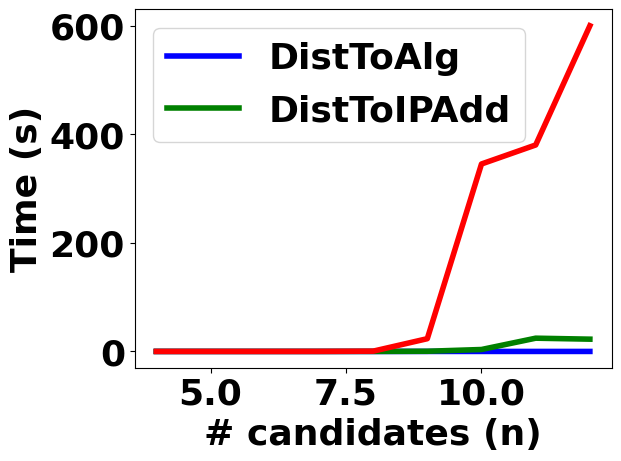

In [25]:
#import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_runtime'].to_list()
u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y,color=hColor,linewidth=4)
plt.plot(x,z,color=oColor,linewidth=4)
plt.plot(x,u,color=bColor,linewidth=4)
plt.tight_layout()
# create an index for each tick position

plt.ylabel('Time (s)')
plt.xlabel('# candidates (n)')
#plt.xticks([4,6,8,10,12], ['4','6','8','10','12'])

plt.legend(["DistToAlg","DistToIPAdd"],loc='upper left')
fig.savefig(r"Figures/addition_food_b=4_vary_n_runtime.pdf",dpi=2024,bbox_inches='tight')

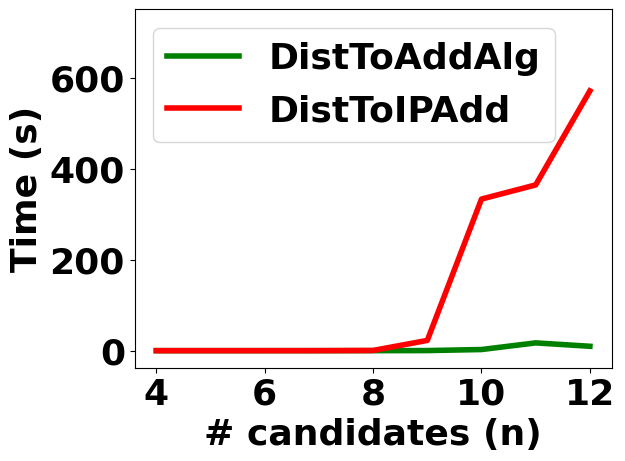

In [29]:
#import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['Our_Time_distanceTo'].to_list()
z = avgDf['Blom_Time_distanceTo'].to_list()

plt.plot(x,y,color=oColor,linewidth=4)
plt.plot(x,z,color=bColor,linewidth=4)
# plt.plot(x,u,color=bColor,linewidth=4)
plt.tight_layout()
# create an index for each tick position

plt.ylabel('Time (s)')
plt.xlabel('# candidates (n)')
plt.xticks([4,6,8,10,12], ['4','6','8','10','12'])
plt.ylim(750*(-5/100),750)
plt.legend(["DistToAddAlg","DistToIPAdd"],loc='upper left')
fig.savefig(r"Figures/addition_food_b=4_vary_n_dto.pdf",dpi=2024,bbox_inches='tight')

In [206]:
import matplotlib.pyplot as plt
#plt.ylim([0,2])
box_plot = sns.boxplot(x='Number_Of_Candidates', y='Margin difference percent', data=result)
fig = box_plot.get_figure()
fig.savefig('Figure/Addition_news_margin_b=4_vary_n.pdf',dpi=1000)

ValueError: Could not interpret input 'Margin difference percent'

In [ ]:

# #create long-form data
# df = pd.DataFrame({'points': [7, 8, 9, 12, 14, 5, 6, 6, 8, 11, 8, 9, 11, 13, 17],
#                    'team': np.repeat(['A', 'B', 'C'], 5)})


In [ ]:
# sns.boxplot(x='team', y='points', data=df)

In [ ]:
avg = result.groupby(['Max_Ballot_length'])['Upper_Bound','heuristicV1_margin','Our_margin','Blom_margin','heuristicV1_runtime','Our_runtime','Blom_runtime','Blom_number_node_explored','Our_number_node_explored'].mean()

In [ ]:
avg

In [30]:
avg.to_csv('Addition_movie_lens_result_n=10.csv')

In [31]:
avgDf = pd.read_csv('Addition_movie_lens_result_n=10.csv')
avgDf

,Max_Ballot_length,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,Our_runtime,Blom_runtime,Blom_number_node_explored,Our_number_node_explored
0,4,668.421533,668.421533,575.589416,575.589416,0.005568,4.264893,6.620505,604.412409,604.412409


In [218]:
avgDf.columns = ['Max_Ballot_length','Upper_Bound', 'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime','Blom_number_node_explored','Our_number_node_explored']

In [219]:
avgDf['Max_Ballot_length'].to_list()

[2, 3, 4, 5, 6, 7, 8, 9, 10]

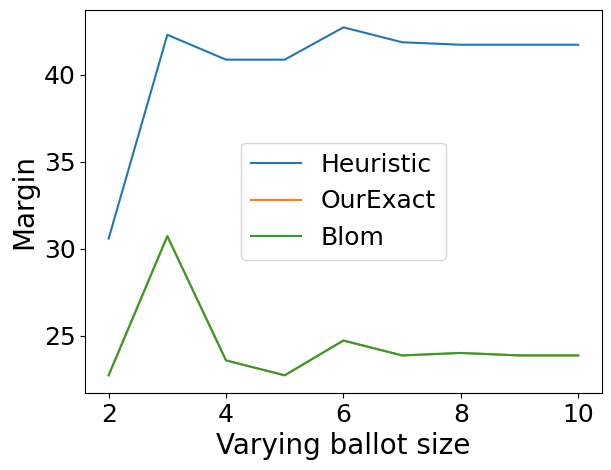

In [220]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()

x  = avgDf['Max_Ballot_length'].to_list()
y = avgDf['heuristicV1_margin'].to_list()
z = avgDf['Our_margin'].to_list()
u = avgDf['Blom_margin'].to_list()


plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,u)

# create an index for each tick position

plt.ylabel('Margin',fontsize=20)
plt.xlabel('Varying ballot size',fontsize=20)

plt.legend(["Heuristic","OurExact","Blom"],fontsize=18,loc='center')
fig.savefig("Addition_movie_lens_margin_n=10_vary_b.pdf")
plt.show()

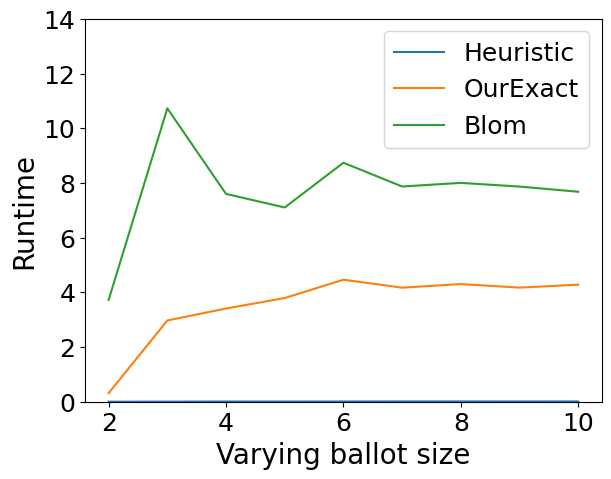

In [221]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()

x  = avgDf['Max_Ballot_length'].to_list()
y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_runtime'].to_list()
u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,u)

# create an index for each tick position

plt.ylabel('Runtime',fontsize=20)
plt.xlabel('Varying ballot size',fontsize=20)
#plt.yticks([0,2,4,6,8,10,12,14], ['0','2','4','6','8','10','12','14'])
plt.ylim(0,14)
plt.legend(["Heuristic","OurExact","Blom"],fontsize=18,loc='upper right')
fig.savefig("Addition_movie_lens_runtime_n=10_vary_b.pdf")
plt.show()

In [222]:

#avgDf = avgDf.drop(avgDf.index[0])

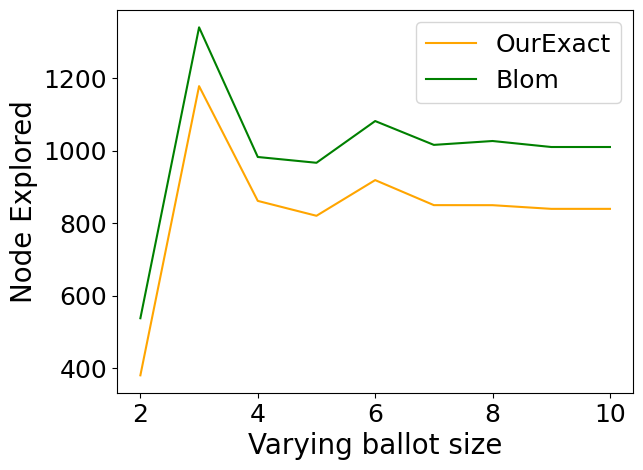

In [223]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()

x  = avgDf['Max_Ballot_length'].to_list()
y = avgDf['Our_number_node_explored'].to_list()
z = avgDf['Blom_number_node_explored'].to_list()
#u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y,color='orange')
plt.plot(x,z,color='green')
#plt.plot(x,u)

# create an index for each tick position

plt.ylabel('Node Explored',fontsize=20)
plt.xlabel('Varying ballot size',fontsize=20)
#plt.yticks([0,2,4,6,8,10,12,14], ['0','2','4','6','8','10','12','14'])
#plt.ylim(0,14)
plt.legend(["OurExact","Blom"],fontsize=18,loc='upper right')
fig.savefig("Addition_movie_lens_node_explored_n=10_vary_b.pdf")
plt.show()

In [ ]:
########################################### vary n #############################################################################

In [32]:
result = pd.read_csv(r"Addiiton_adressa_boxplot.csv")

In [33]:
result

,Unnamed: 0,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,...,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,Our_Time_distanceTo,Blom_Time_distanceTo,Our_Time_lbcall,Blom_Time_lbcall
0,10,adressa=4_ballot=4,4,457,4,virginia,38,38,38,38,...,0,5,6,6,0.000316,0,0.001179,0.054172,0.000105,0.000438
1,12,adressa=4_ballot=4,4,457,4,new hampshire,113,113,104,104,...,0,8,9,9,0.000406,1,0.002059,0.031041,0.000103,0.000744
2,15,adressa=4_ballot=4,4,457,4,rio grande do norte,25,25,5,5,...,0,12,14,14,0.001310,1,0.004929,0.024185,0.000209,0.000990
3,25,adressa=4_ballot=4,4,457,4,georgia,38,38,38,38,...,0,5,6,6,0.000330,0,0.001230,0.005182,0.000126,0.000457
4,31,adressa=4_ballot=4,4,457,4,faro,38,38,38,38,...,0,5,6,6,0.000396,0,0.001516,0.007381,0.000131,0.000542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1282,adressa=8_ballot=4,8,3246,4,espirito santo,1481,1481,1481,1481,...,0,1970,1971,1971,2.204612,206,13.738980,22.674971,0.002579,1.770755
544,1283,adressa=8_ballot=4,8,3246,4,valle del cauca,499,499,499,499,...,0,1335,1588,1588,1.927678,0,8.404814,11.004128,0.002397,1.623740
545,1284,adressa=8_ballot=4,8,3246,4,puerto rico,1481,1481,499,499,...,0,2923,2924,2924,3.616570,238,19.873486,30.068558,0.012844,2.930251
546,1285,adressa=8_ballot=4,8,3246,4,huelva,1487,1487,1439,1439,...,0,1789,1790,1790,2.014206,174,12.555670,20.071913,0.002712,1.609556


In [34]:
result.columns

Index(['Unnamed: 0', 'Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'Our_Time_distanceTo',
       'Blom_Time_distanceTo', 'Our_Time_lbcall', 'Blom_Time_lbcall'],
      dtype='object')

In [35]:
avg = result.groupby(['Number_Of_Candidates'])['Upper_Bound','heuristicV1_margin','Our_margin','Blom_margin','heuristicV1_runtime','Our_runtime','Blom_runtime','Blom_number_node_explored','Our_number_node_explored','Our_Time_distanceTo','Blom_Time_distanceTo'].mean()

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [36]:
avg

,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,Our_runtime,Blom_runtime,Blom_number_node_explored,Our_number_node_explored,Our_Time_distanceTo,Blom_Time_distanceTo
Number_Of_Candidates,,,,,,,,,,,
4,51.488889,51.488889,37.266667,37.266667,0.000408,0.003562,0.019779,8.322222,8.322222,0.002380,0.018212
5,283.017094,283.017094,268.683761,268.683761,0.001374,0.053289,0.154483,41.068376,41.068376,0.043455,0.140844
6,526.178862,526.178862,465.349593,465.349593,0.003775,0.403325,0.669374,131.471545,131.471545,0.332303,0.593943
7,1025.904762,1025.904762,859.944444,859.944444,0.007340,2.279998,3.562910,476.269841,476.269841,1.909484,3.155601
8,1462.652174,1462.652174,1250.456522,1250.456522,0.015919,21.670840,33.444812,2711.771739,2711.771739,18.486905,29.957593


In [37]:
avg.to_csv(r'Addition_news_b=4_int1.csv')

In [38]:
avgDf = pd.read_csv(r'Addition_news_b=4_int1.csv')
avgDf

,Number_Of_Candidates,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,Our_runtime,Blom_runtime,Blom_number_node_explored,Our_number_node_explored,Our_Time_distanceTo,Blom_Time_distanceTo
0,4,51.488889,51.488889,37.266667,37.266667,0.000408,0.003562,0.019779,8.322222,8.322222,0.002380,0.018212
1,5,283.017094,283.017094,268.683761,268.683761,0.001374,0.053289,0.154483,41.068376,41.068376,0.043455,0.140844
2,6,526.178862,526.178862,465.349593,465.349593,0.003775,0.403325,0.669374,131.471545,131.471545,0.332303,0.593943
3,7,1025.904762,1025.904762,859.944444,859.944444,0.007340,2.279998,3.562910,476.269841,476.269841,1.909484,3.155601
4,8,1462.652174,1462.652174,1250.456522,1250.456522,0.015919,21.670840,33.444812,2711.771739,2711.771739,18.486905,29.957593


In [39]:
avgDf.columns = ['Number_Of_Candidates','Upper_Bound', 'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime','Blom_number_node_explored','Our_number_node_explored','Our_Time_distanceTo','Blom_Time_distanceTo']

In [40]:
# import matplotlib.pyplot as plt
# #plt.rcParams.update({'font.size': 18})
# fig, ax = plt.subplots(nrows=1, ncols=1)
# fig.tight_layout()


# x  = avgDf['Number_Of_Candidates'].to_list()
# y = avgDf['heuristicV1_margin'].to_list()
# z = avgDf['Our_margin'].to_list()
# u = avgDf['Blom_margin'].to_list()


# plt.plot(x,y)
# plt.plot(x,z)
# plt.plot(x,u)

# # create an index for each tick position

# plt.ylabel('Margin',fontsize=18)
# plt.xlabel('Varying #candidates',fontsize=18)
# #plt.yticks([0,5,10,15,20], ['0','5','10','15','20'])

# plt.legend(["Heuristic","OurExact","Blom"],fontsize=18,loc='center')
# fig.savefig("Figure/Addition_books_margin_b=4_vary_n.pdf")

In [41]:
# yvals = [math.ceil(x) for x in result['heuristicV1_margin'].to_list()] 
# zvals = [math.ceil(x) for x in result['Our_margin'].to_list()]
# kvals =  [math.ceil(x) for x in result['Blom_margin'].to_list()]
# ticklabels = tuple(result['Number_Of_Candidates'].to_list())
# ticklabels

In [42]:
x  = avgDf['Number_Of_Candidates'].to_list()

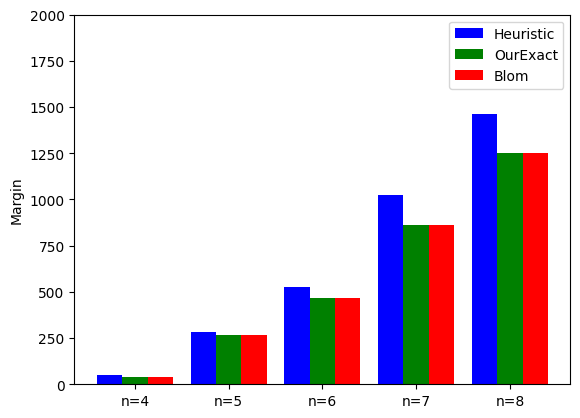

In [46]:
import numpy as np
import matplotlib.pyplot as plt
N = len(x)
ind = np.arange(N)  # the x locations for the groups
width = 0.27     # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['heuristicV1_margin'].to_list()
z = avgDf['Our_margin'].to_list()
u = avgDf['Blom_margin'].to_list()
ticklabels = []
for i in x:
    s = "n="+str(i)
    ticklabels.append(s)


rects1 = ax.bar(ind, y, width, color=hColor)
rects2 = ax.bar(ind+width, z, width, color=oColor)
rects3 = ax.bar(ind+width*2, u, width, color=bColor)

ax.set_ylabel('Margin')
ax.set_xticks(ind+width)
ax.set_xticklabels( ticklabels )
ax.tick_params(axis='both', which='major', labelsize=10)

ax.legend( (rects1[0], rects2[0], rects3[0]), ('Heuristic', 'OurExact', 'Blom') )
plt.ylim(0,2000)
plt.savefig('Figure/Addition_news_margin_b=4_vary_n.pdf',dpi=1000)
plt.show()

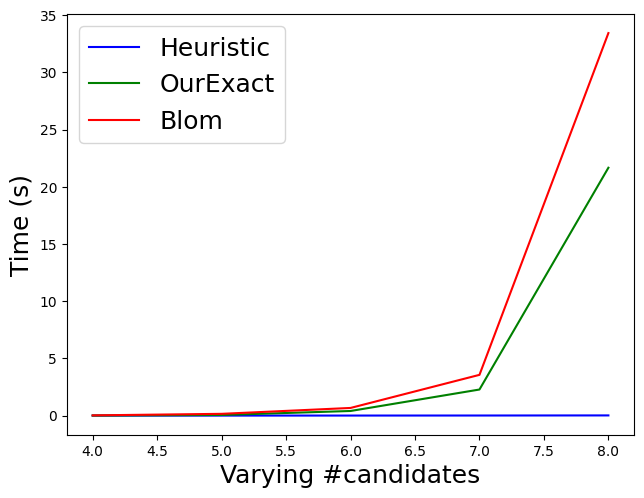

In [47]:
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_runtime'].to_list()
u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y,color=hColor)
plt.plot(x,z,color=oColor)
plt.plot(x,u,color=bColor)

# create an index for each tick position

plt.ylabel('Time (s)',fontsize=18)
plt.xlabel('Varying #candidates',fontsize=18)
#plt.yticks([0,5,10,15,20], ['0','5','10','15','20'])

plt.legend(["Heuristic","OurExact","Blom"],fontsize=18,loc='upper left')
fig.savefig(r"Figure/Addition_news_runtime_b=4_vary_n.pdf",dpi=1000)

In [61]:
# import matplotlib.pyplot as plt

# #plt.rcParams.update({'font.size': 18})
# fig, ax = plt.subplots(nrows=1, ncols=1)
# fig.tight_layout()


# x  = avgDf['Number_Of_Candidates'].to_list()
# y = avgDf['Our_number_node_explored'].to_list()
# z = avgDf['Blom_number_node_explored'].to_list()
# #u = avgDf['Blom_runtime'].to_list()


# plt.plot(x,y)
# plt.plot(x,z)
# #plt.plot(x,u)

# # create an index for each tick position

# plt.ylabel('# Node explored',fontsize=18)
# plt.xlabel('Varying #candidates',fontsize=18)
# #plt.yticks([0,5,10,15,20], ['0','5','10','15','20'])

# plt.legend(["OurExact","Blom"],fontsize=18,loc='upper left')
# fig.savefig(r"Figure/Addition_books_node_explored_b=4_vary_n.pdf")

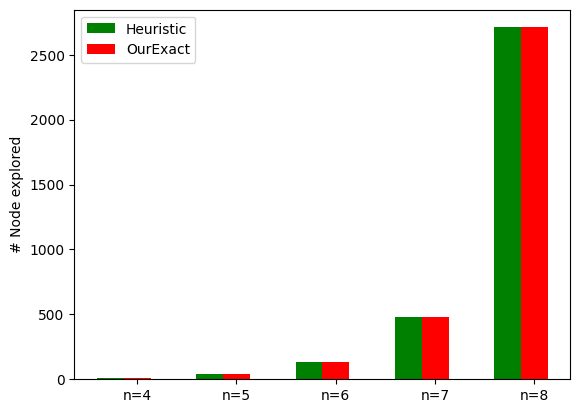

In [48]:
import numpy as np

N = len(x)
ind = np.arange(N)  # the x locations for the groups
width = 0.27     # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['Our_number_node_explored'].to_list()
z = avgDf['Blom_number_node_explored'].to_list()
ticklabels = []
for i in x:
    s = "n="+str(i)
    ticklabels.append(s)


rects1 = ax.bar(ind, y, width, color=oColor)
rects2 = ax.bar(ind+width, z, width, color=bColor)
#rects3 = ax.bar(ind+width*2, u, width, color='b')

ax.set_ylabel('# Node explored')
ax.set_xticks(ind+width)
ax.set_xticklabels( ticklabels )
ax.tick_params(axis='both', which='major', labelsize=10)

ax.legend( (rects1[0], rects2[0]), ('Heuristic', 'OurExact') )
#plt.ylim(1700,1850)
plt.savefig('Figure/Addition_news_node_explored_b=4_vary_n.pdf',dpi=1000)
plt.show()

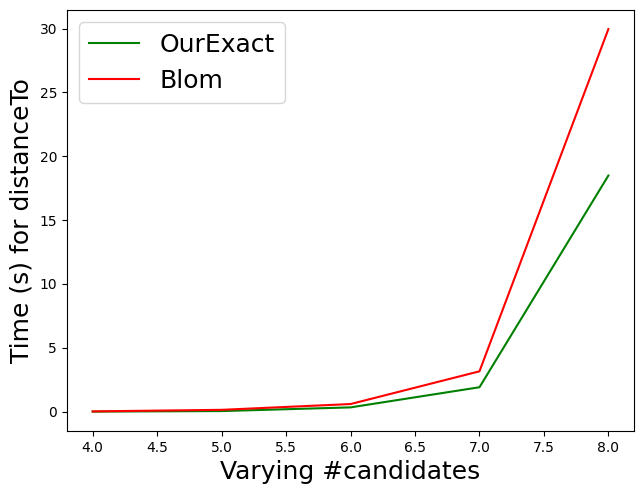

In [49]:
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Number_Of_Candidates'].to_list()
#y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_Time_distanceTo'].to_list()
u = avgDf['Blom_Time_distanceTo'].to_list()


#plt.plot(x,y)
plt.plot(x,z,color=oColor)
plt.plot(x,u,color=bColor)

# create an index for each tick position

plt.ylabel('Time (s) for distanceTo',fontsize=18)
plt.xlabel('Varying #candidates',fontsize=18)
#plt.yticks([0,5,10,15,20], ['0','5','10','15','20'])

plt.legend(["OurExact","Blom"],fontsize=18,loc='upper left')
fig.savefig(r"Figure/Addition_news_runtime_distanceTo_b=4_vary_n.pdf",dpi=1000)